<a href="https://colab.research.google.com/github/woogwayeon/25HC_Python_Basic/blob/master/25HC_0508_python_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 얕은 복사 (shallow copy)

In [1]:
# 상수의 id값 알아보기

id(2)

10750888

In [4]:
a = 3
b = a
a = 4
# print(a == b) // 값을 가지고 비교
a is b # 참조하는 메모리를 가지고 비교, 즉 완전한 속성을 비교하는 것..(?)

False

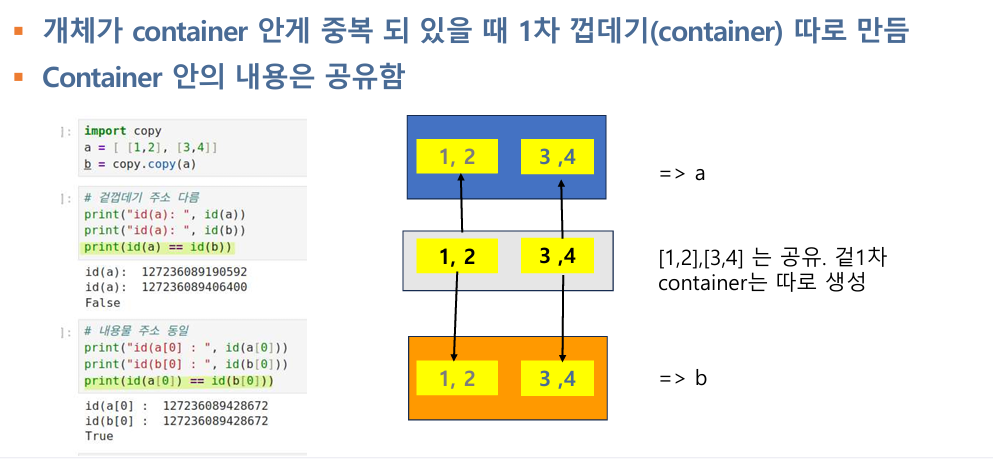

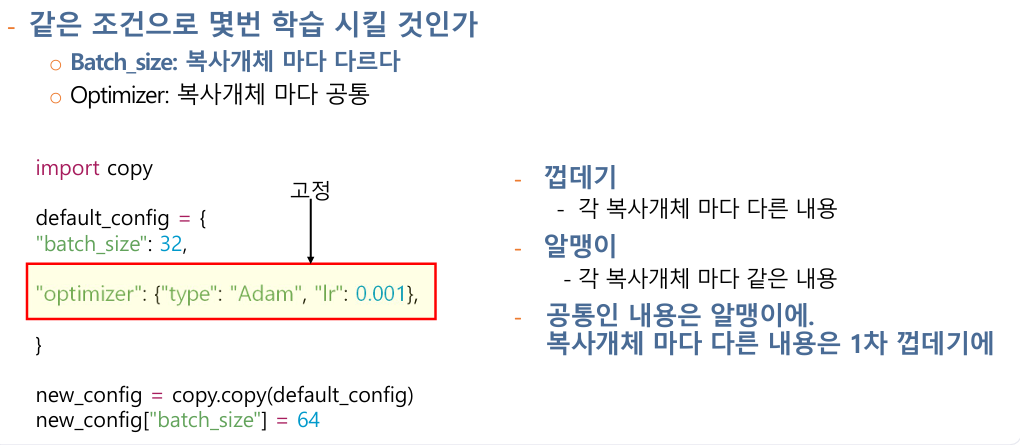








# 깊은 복사 (deep copy)

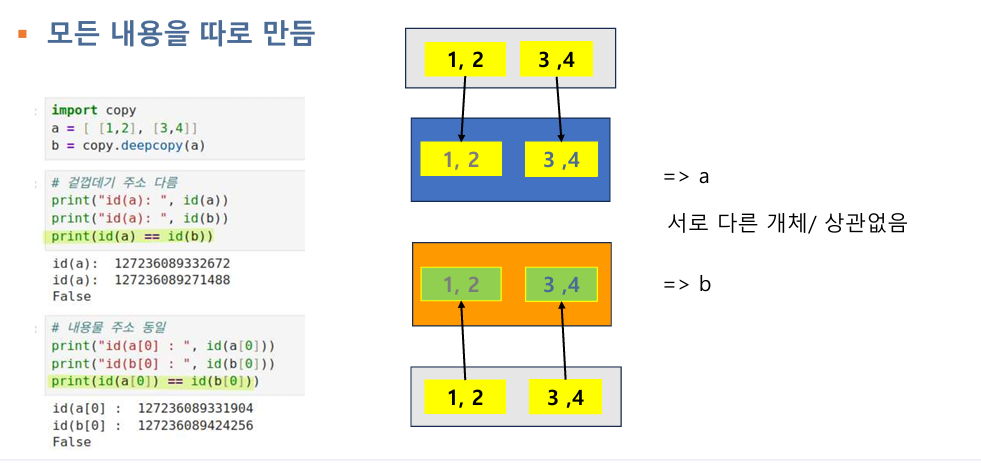

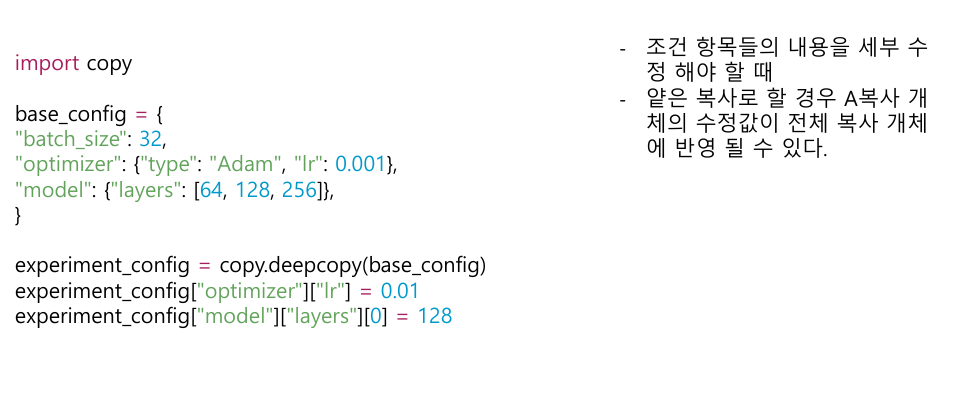

In [6]:
# 얕은 복사

import copy

a = [[1,2],[3,4]] # 최외곽이 [ ] 껍데기
b = copy.copy(a)

print("a의 껍데기 id(a)", id(a))
print("b의 껍데기 id(b)", id(b))

print()

print("a의 내용물 id(a[0])", id(a[0]))
print("b의 내용물 id(b[0])", id(b[0]))


a의 껍데기 id(a) 135948281521280
b의 껍데기 id(b) 135948281419200

a의 내용물 id(a[0]) 135948283916928
b의 내용물 id(b[0]) 135948283916928


In [8]:
# 깊은 복사 // 너는 안전하고 나는 나 할일하고 할 때 쓰는 방식

import copy

a = [[1,2],[3,4]] # 최외곽이 [ ] 껍데기
b = copy.deepcopy(a)  # deepcopy

print("a의 껍데기 id(a)", id(a))
print("b의 껍데기 id(b)", id(b))

print()

print("a의 내용물 id(a[0])", id(a[0]))
print("b의 내용물 id(b[0])", id(b[0]))


a의 껍데기 id(a) 135948281540928
b의 껍데기 id(b) 135948296938048

a의 내용물 id(a[0]) 135948281541120
b의 내용물 id(b[0]) 135948281703168


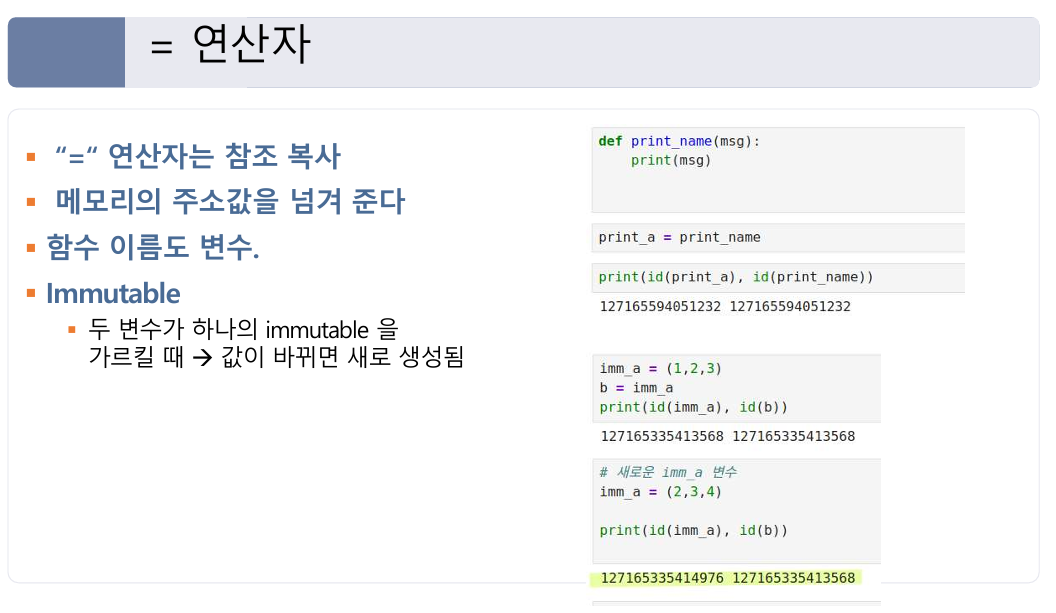

In [12]:
def print_name(msg):
    print(msg)

print_name('seoyeon')

print_funcpy = print_name # 이게 핵심
print_funcpy('seoyeon')

# 그냥 포인터로 이해하면 된다
print(id(print_funcpy) == id(print_name))
print(id(print_funcpy) is id(print_name))

seoyeon
seoyeon
True
False


# 함수 안의 함수

In [15]:
# 예제1

def greet(name):
    return print(f"hello {name}")

greet('seoyeon')

def outerFunc(func):
    def wrapper(name):
        name = name.upper()
        return func(name)
    return wrapper

upgrad_greet = outerFunc(greet)
upgrad_greet('seoyeon')

hello seoyeon
hello SEOYEON


In [18]:
# 예제2

def square(num):
    return num * num

print(square(3))

# 3을 입력하게 되면 6을 입력한 효과 .. 입력한 값의 2배한 값의 제곱??? ㅇㅋㅇㅋ
# (3 * 2) ^ 2 -> 36되게

def outerFanc2(func):
    def wrapper(num):
        num = num*2
        return func(num)
    return wrapper

upgrade_square = outerFanc2(square)
res = upgrade_square(3)

print(res)

9
36


In [19]:
def make_api_request(base_url):
    def request(path):
        return print(f"GET {base_url}/{path}")
    return request

user_api = make_api_request("https://example.com/user")
print(user_api("profile"))

# GET - https://example.com/user/profile

GET https://example.com/user/profile
None


# 클로저 (closure)

주머니에 담아서 밀폐시키겠다 뭐 그런 의미입니다

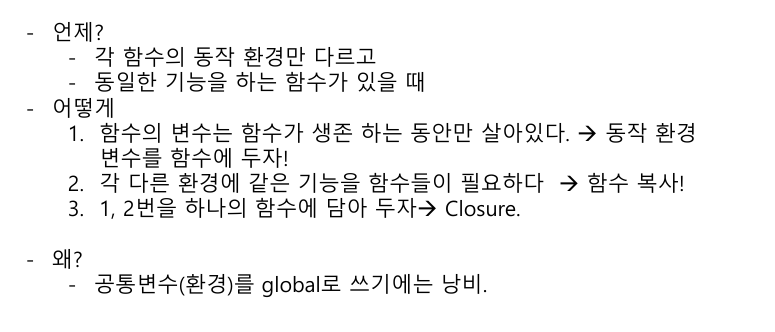

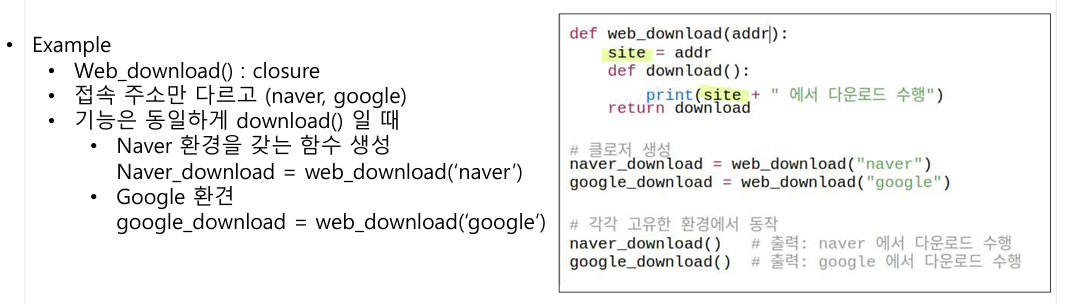

In [23]:
def mul(m): # wrapper가 동작하는데 쓰이는 변수로 동작 (?)
    def wrapper(n):
        return m * n
    return wrapper


mul3 = mul(3) # outer에 인자 전달 - 즉 무조건 3배 하는 함수로 만들어줌
mul5 = mul(5) # outer에 인자 전달 - 즉 무조건 5배 하는 함수로 만들어줌

print(mul3(5))
print(mul5(5))

15
25


이것의 목적은 뭘까?

클로저는 비슷한 종류의 함수끼리 공유하는...

클래스의 함수 한정 버전이라고 생각해보자 (그럼 이해가 좀 쉬워지니? ㅋㅋㅋㅋㅋㅋㅋ.. 뭐 그렇다!)

## Closure Nonlocal

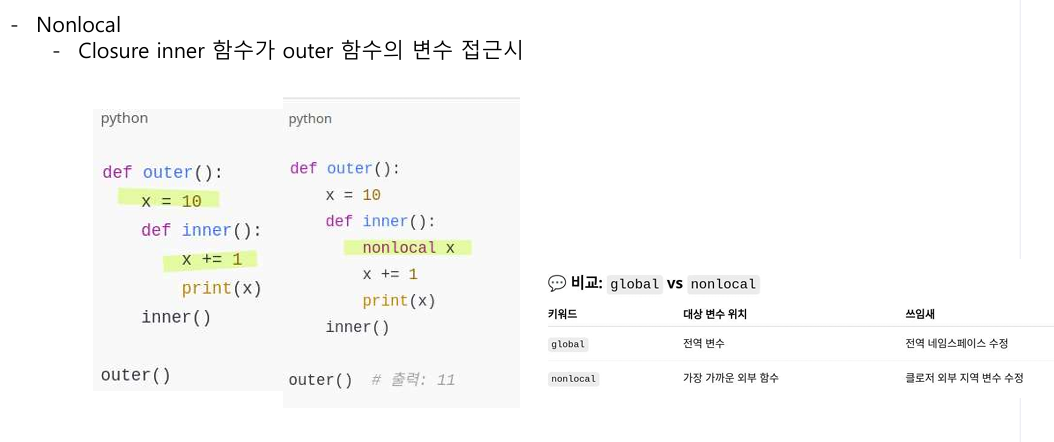

In [27]:
def outer():
    x = 10
    def inner():
        nonlocal x # 한단계 위로 가서 x 찾아오렴 그니까 위에있다고 참조못함.. 왜일까?
        x = x + 1
        print(x)
    inner()
outer()

11


In [28]:
count = 0
def counter():
    global count
    count = count + 1
    return count

print(counter())
print(counter())
print(counter())
print(counter())

1
2
3
4


In [30]:
def counter2():
    count = 0
    def wrapper():
        nonlocal count
        count = count + 1
        return count
    return wrapper

nc = counter2()

print(nc())
print(nc())
print(nc())
print(nc())

1
2
3
4


In [37]:
# 쭉죽 증가하는 것도 만들 수 있다

def counter3(inc):
    count = 0
    def wrapper():
        nonlocal count
        count = count + inc
        return count
    return wrapper

nc2 = counter3(2) # 2씩 증가 (인자로 준 inc의 값을 2로 줬으니..!)
nc3 = counter3(3) # 3씩 증가 (마찬가지임)
nc4 = counter3(4) # 4씩 증가 (마찬가지임)

print(nc3())
print(nc3(),"\n")
print(nc4())
print(nc4())

3
6 

4
8


In [39]:
def outer_msg(prefix):
    def wrapper(name):
        return prefix + ":" + name
    return wrapper

hello_func = outer_msg('hello')
hello_func('seoyeon')

'hello:seoyeon'

In [42]:
# 기준 이상만 true를 반환하는 함수 만들기

def outer_num(flagNum):

    def wrapper(inpNum):
        return flagNum < inpNum

    return wrapper

over_10 = outer_num(10)
print(over_10(8))
print(over_10(12))

False
True


# 데코레이터 (decorator)

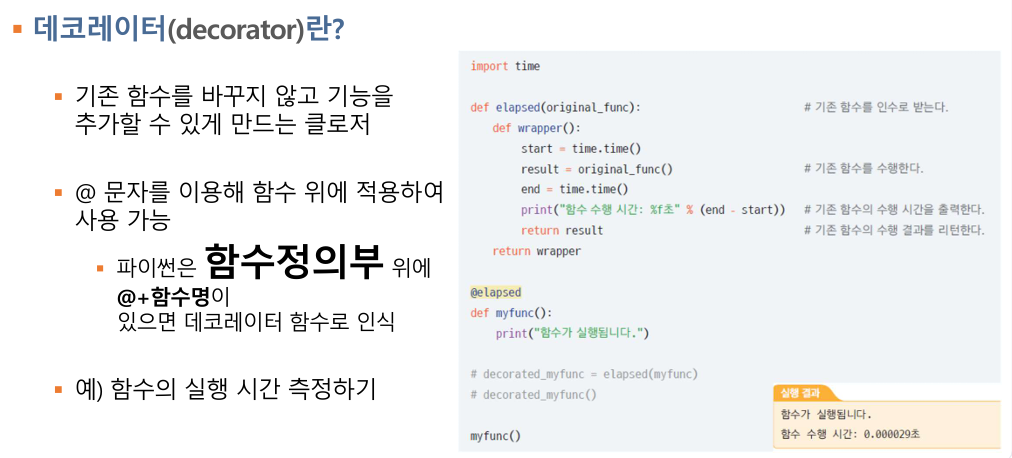

In [44]:
def outer(func):

    def wrapper():
        print("hi")
        func()
        print("bye")

    return wrapper

@outer
def say_hello():
    print("안녕하세요")

say_hello()

hi
안녕하세요
bye


데코레이터는 어디서 쓰이나요?

기존 함수에 추가되는 기능을 만드는데, 너무 흔하게 쓰일 때!

ex - 실행 시간을 체크하거나, 뭐 등등

## 함수 실행 시간을 측정하는 데코레이터

In [54]:
import time

def outer(func):
    def wrapper():
        start = time.time()
        func()
        end = time.time()
        print("\n실행시간은 %f초 입니다" % (end - start))
    return wrapper

@outer
def myFunc():
    print("im running")

myFunc()

@outer
def myFunc2():
    print("im closure")
    time.sleep(1)

myFunc2()

im running

실행시간은 0.000065초 입니다
im closure

실행시간은 1.000145초 입니다


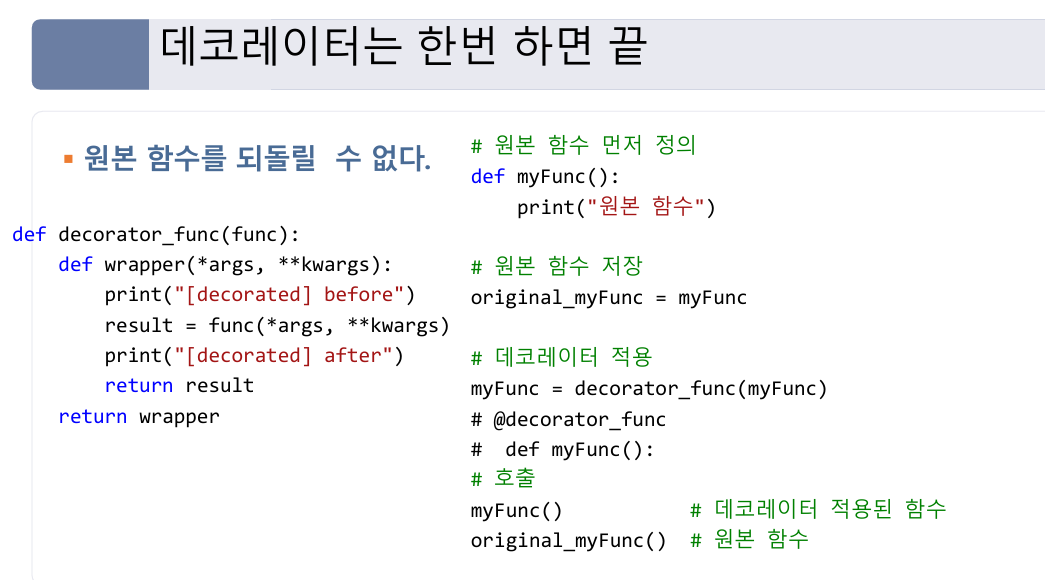

# 이터레이터(iterator)

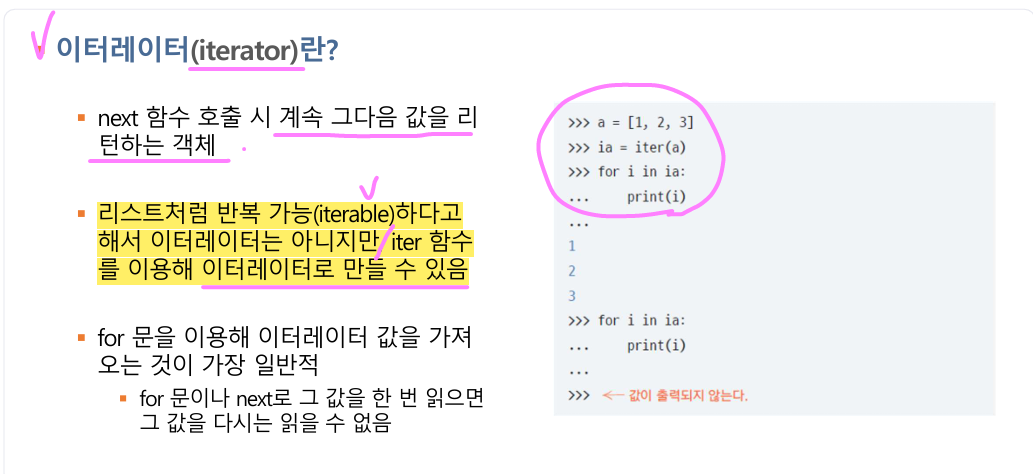

### **iterable** 한 애가 **iterator** 로 만들 수 있다! 이렇게 생각하자~~

In [57]:
a = [1,2,3]
b = 'abcde'

for i in b:
    print(i)


ia = iter(a)

for i in ia:
    print(i)

for i in ia:
    print(i) # 한번 내용을 뽑아내면 다시 못돌아감.. 따하

a
b
c
d
e
1
2
3


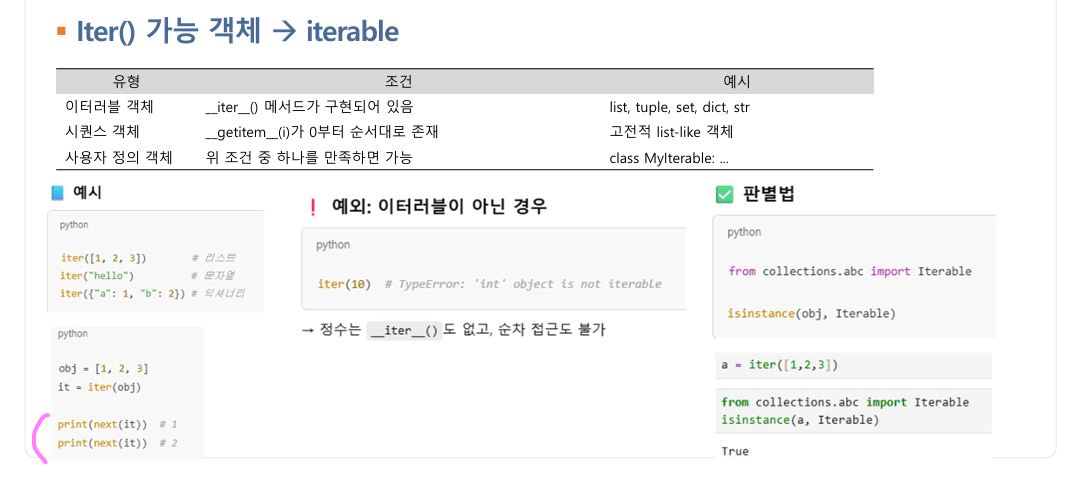

In [64]:
a = [1,2,3]

ia = iter(a)

next(ia) # 이터레이터만 할 수 있음
next(ia)
next(ia)
# next(ia) # StopIteration 오류가 나온다

3

In [74]:
a = [1, 2, 3]
hasattr(a, "__iter__") # True 나오니까 iterable 하다
hasattr(3, "__iter__") # False 나오니까 iterable 하다

c = 'seoyeon'
hasattr(c, "__iter__") # True 나오니까 iterable 하다

ic = iter(c)
next(ic)

's'

In [78]:
basket = ('사과', '바나나','딸기', '키위', '망고', '수박', '감')
print(hasattr(basket, "__iter__"))

i_basket = iter(basket)

print(next(i_basket))
print(next(i_basket))
print(next(i_basket))

True
사과
바나나
딸기


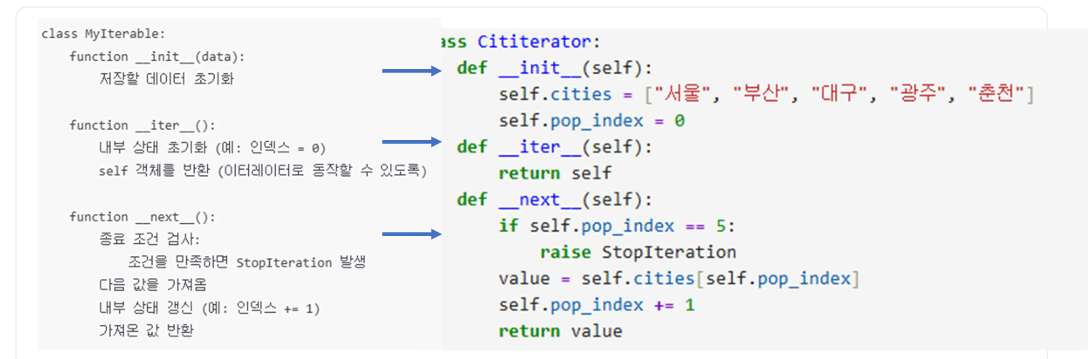

##이터레이터 실습

In [87]:
# 도시의 이름을 출력해주는 자료형을 만들어보자!
# 서울, 대전, 대구, 춘천

class Citirator:

    # init은 초기화
    def __init__(self):
        self.cities = ['서울','파리','뉴욕','비엔나','춘천']
        # next가 호출될때마다 한개씩 호출되면 되겠다 - 인덱스 이용
        self.popInx = 0

    def __iter__(self):
        return self

    def __next__(self):

        if self.popInx > 4 :
            raise StopIteration # iteration err 츄가

        value = self.cities[self.popInx]
        self.popInx += 1
        return value

city = Citirator()

print(next(city))
print(next(city))
print(next(city))
print(next(city))
print(next(city))
print(next(city))


서울
파리
뉴욕
비엔나
춘천


StopIteration: 

In [98]:
class MyCounter:

    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.current = self.start

    def __iter__(self):
        self.current = self.start
        return self

    def __next__(self):

        if self.current > self.end :
            raise StopIteration

        value = self.current
        self.current += 1
        return value

mc = MyCounter(3, 10)
print(next(mc))


3


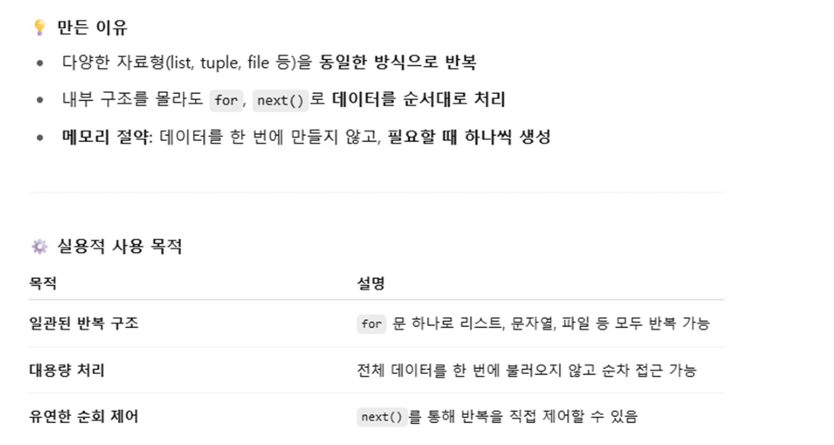

# 제너레이터 (generator)

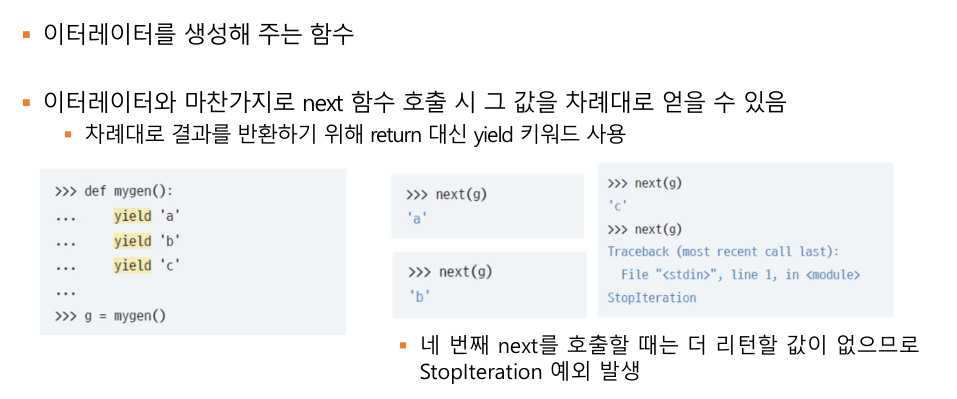

In [103]:
from re import I

def mygen():
    for i in range(1, 100):
        result = i * i
        yield result   # retrun 대신에 yield 해주면 된다

gen = mygen()   # ia = iter(a) 와 비슷한 작업이라고 생각하면 됩니다

print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

1
4
9
16


In [107]:
def count_upto(n):
    i = 1
    while i<=n :
        yield i
        i += i

gen2 = count_upto(5)

print(next(gen2))
print(next(gen2))
print(next(gen2))

1
2
4


In [114]:
def citirator():

    cities = ['서울','대전','대구','부산','춘천']
    i = 0

    while i < len(cities) :
        yield cities[i]
        i += 1

city = citirator()

print(next(city))
print(next(city))
print(next(city))
print(next(city))
print(next(city))

서울
대전
대구
부산
춘천


## generator expression

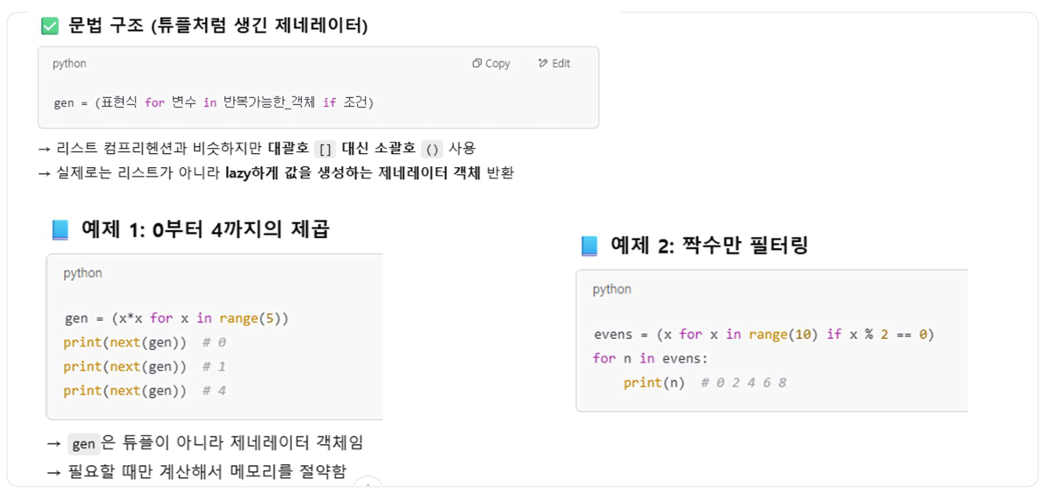

In [116]:
a = [ x for x in range(1, 10) ]
[ x * x for x in a ]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [119]:
gen = ( x * x for x in a )

print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

1
4
9
16
25
36
49
64


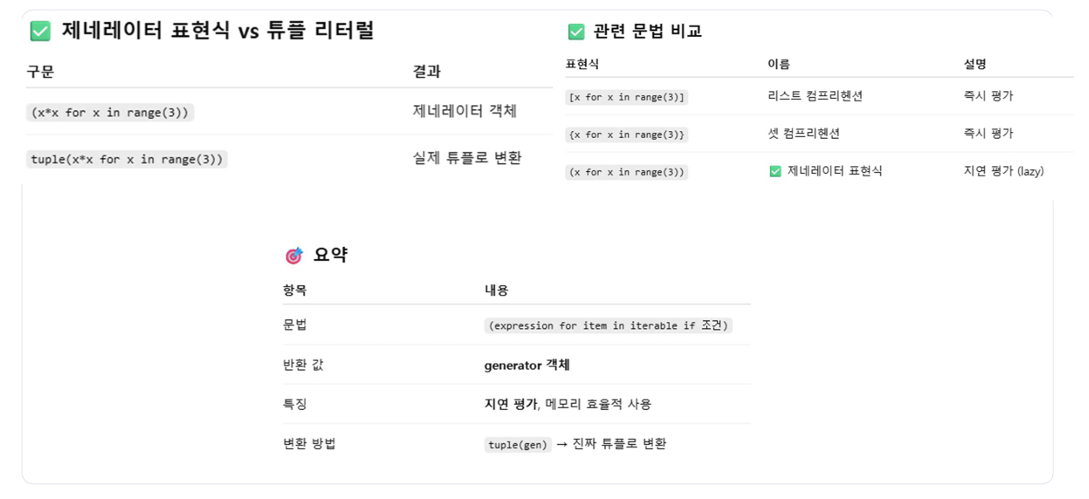

In [130]:
gen_even = ( x for x in range(1, 20) if x % 2 == 0 )

tp = (tuple(gen_even)) # 튜플로 만들어서 쓰려면 이렇게 바꿔줘야 한다!

print(tp)

itp = iter(tp)

print(next(itp))
print(next(itp))
print(next(itp))
print(next(itp))
print(next(itp))

(2, 4, 6, 8, 10, 12, 14, 16, 18)
2
4
6
8
10


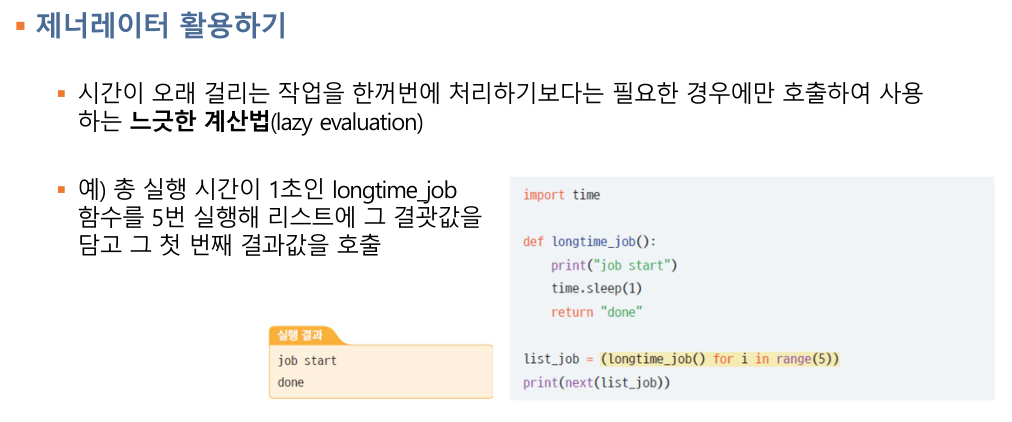

뭔소리냐면 작업이 5초 걸릴때 5초 기다려야 답이 나오지만

이 lazy evalution 을 사용하면 1초하고 답주고 1초하고 답주고 한다 총 5초 걸리는건 같지만 뭔가 빨리 받는 기분이 든다!

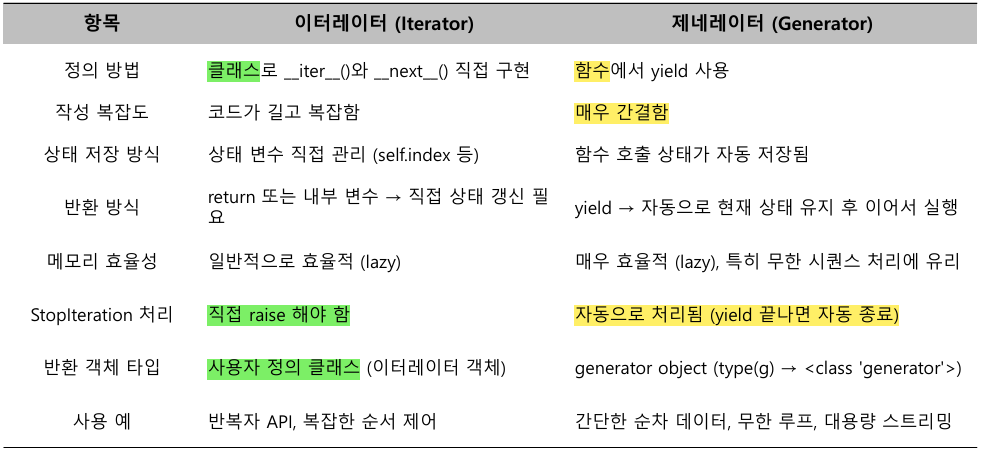

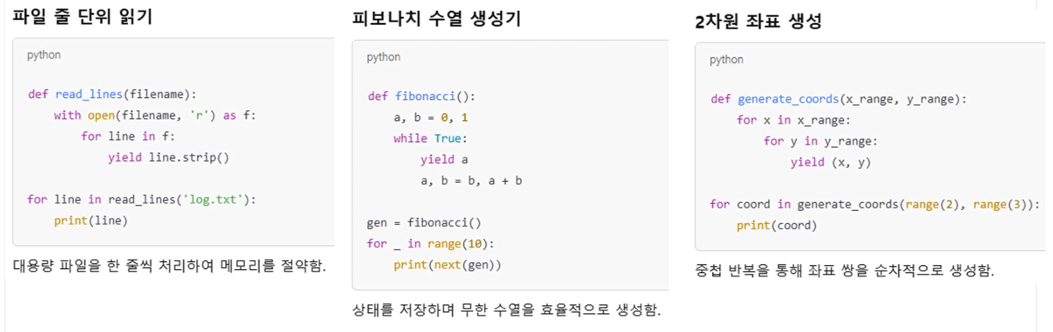

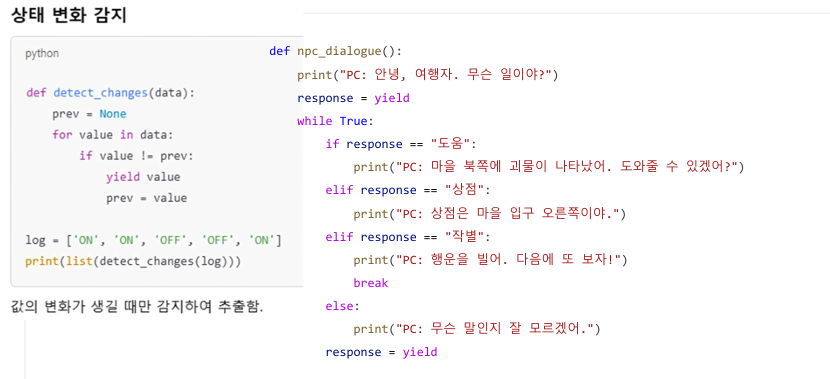

# 동적 언어와 정적 언어

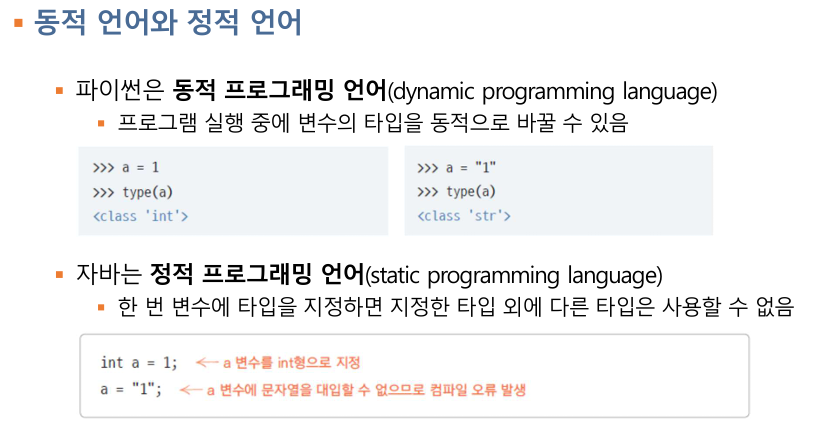

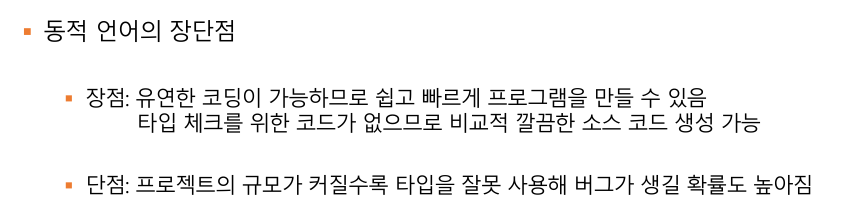

## 파이선 타입 어노테이션 (Type annotation)

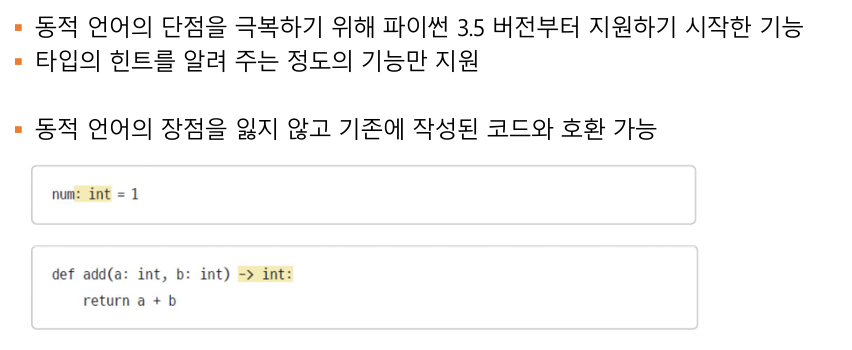

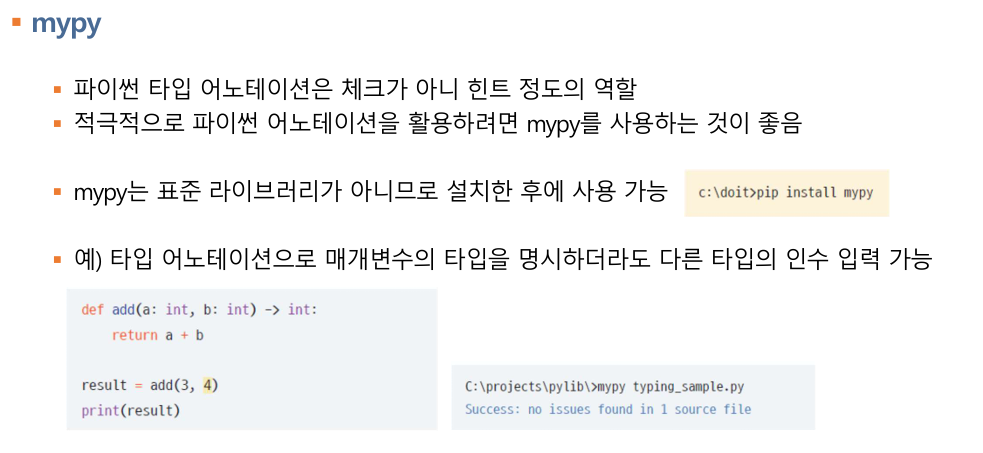